In [49]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


# Importing Data

In [50]:
#imports 
import pandas as pd
import plotly as py
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [82]:
# import of the Data set
bank_db = 'C:/Users/blake/OneDrive/Desktop/MSDS 7331/Project_1/Data/bank_dataset.csv'

In [83]:
#reading it in
bank_db_df = pd.read_csv(bank_db)

# First Look 

In [84]:
# First look at the Data Set 
bank_db_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [85]:
# Documentaion of the data set from'https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients' 
# Noted below on the catagorical variables UCI stated

In [86]:
# Gender (1 = male; 2 = female) 
Gender = bank_db_df.groupby('SEX')['ID'].nunique()
# Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)
EDUCATION = bank_db_df.groupby('EDUCATION')['ID'].nunique()
# Marital status (1 = married; 2 = single; 3 = others)
MARRIAGE = bank_db_df.groupby('MARRIAGE')['ID'].nunique()
print(Gender)
print(EDUCATION)
print(MARRIAGE)

#based on this documentaion there are addtional variables in Education and Marital Status

### purposed code from Stack Overflow for this.

SEX
1    11888
2    18112
Name: ID, dtype: int64
EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: ID, dtype: int64
MARRIAGE
0       54
1    13659
2    15964
3      323
Name: ID, dtype: int64


In [10]:
# Group-By for the data by the Catagorical Variables - Noticed there were groups that were not defined by the data set  
bank_db_df.groupby(['SEX','EDUCATION','MARRIAGE']).mean()

ID      LIMIT_BAL        AGE     PAY_0  \
SEX EDUCATION MARRIAGE                                                     
1   0         1         27213.500000  205000.000000  41.000000 -1.500000   
              2         14308.000000  215000.000000  36.500000  0.000000   
    1         0         24444.000000  300000.000000  37.000000 -1.000000   
              1         14549.651479  262485.207101  42.423077 -0.220118   
              2         14363.201671  192085.074060  31.704899 -0.147360   
              3         11595.233333  165333.333333  44.533333 -0.033333   
    2         0         24722.000000  360000.000000  38.000000 -1.000000   
              1         15296.578903  162101.265823  40.332489  0.115612   
              2         14656.010204  112442.176871  31.584354  0.272789   
              3         15215.031746   70952.380952  40.698413  0.142857   
    3         0         11619.916667   96666.666667  38.000000  0.250000   
              1         14847.441794  140143.129771  44.338740  0.189885   
              2         15117.636465  100847.516779  35.379195  0.268456   
              3         13351.583333   69166.666667  47.722222  0.361111   
    4         1         17826.722222  230000.000000  41.777778 -0.222222   
              2         17408.521739  173478.260870  28.173913 -0.478261   
              3         23938.000000  150000.000000  27.000000 -1.000000   
    5         1         20020.500000  209916.666667  39.354167 -0.208333   
              2         18037.065217  107608.695652  32.630435  0.282609   
              3         27406.000000  100000.000000  44.000000  2.000000   
    6         1         19884.500000  165714.285714  48.000000 -0.714286   
              2         17602.545455  146363.636364  40.363636 -0.090909   
2   0         1         21578.000000  135000.000000  37.500000 -1.000000   
              2         13962.000000  267500.000000  42.000000 -0.500000   
    1         0         13005.000000  160000.000000  36.333333 -1.000000   
              1         15033.563976  245319.881890  38.870571 -0.360236   
              2         14823.686063  190821.360153  30.158046 -0.234195   
              3         14976.950000  184000.000000  38.150000 -0.050000   
    2         0         13161.800000  166000.000000  35.800000  0.000000   
              1         15272.627013  164180.679785  37.527504  0.016324   
              2         14888.093137  146840.686275  30.405637  0.062500   
              3         13705.131313   96363.636364  40.868687  0.222222   
    3         0         17418.250000  126562.500000  38.218750 -0.218750   
              1         15914.895201  129387.755102  42.356315  0.076117   
              2         15262.420690  135674.876847  36.240394  0.054187   
              3         12542.238806   78059.701493  46.059701  0.179104   
    4         1         18767.176471  247941.176471  37.941176 -0.823529   
              2         17766.622222  222000.000000  30.355556 -0.400000   
              3         24423.500000  235000.000000  40.500000  0.000000   
    5         1         16835.029412  185784.313725  37.725490 -0.235294   
              2         16274.679012  157901.234568  32.234568 -0.185185   
              3         15354.500000  110000.000000  37.500000  0.000000   
    6         1         16326.214286  153571.428571  45.000000 -0.071429   
              2         13957.400000  111000.000000  40.900000  0.300000   
              3         10747.000000  185000.000000  42.000000  0.000000   

                           PAY_2     PAY_3     PAY_4     PAY_5     PAY_6  \
SEX EDUCATION MARRIAGE                                                     
1   0         1        -1.500000 -1.500000 -1.500000 -1.000000 -1.500000   
              2        -0.833333 -1.166667 -1.000000 -1.166667 -1.666667   
    1         0        -1.000000 -1.000000 -1.000000  0.000000  0.000000   
              1        -0.418935 -0.459763 -0.495266 -0.521893 -0.528402   
     

# Cleaning the Data

In [19]:
# Cleaning the Data on Unrepresented Variables
#Since both Education and Marrage have a others catagory we decided to include the vaules to in the other catagory since 
# we can not state the meaning of these.

bank_db_df['EDUCATION'] = bank_db_df['EDUCATION'].replace([0,5,6],4)


bank_db_df['MARRIAGE'] = bank_db_df['MARRIAGE'].replace([0],3)

#bank_db_df.EDUCATION.unique()
#bank_db_df.MARRIAGE.unique()

array([1, 2, 3], dtype=int64)

In [21]:
#Checking the Data Quality
bank_db_df.groupby(['SEX','EDUCATION','MARRIAGE']).mean().head()

ID      LIMIT_BAL        AGE     PAY_0  \
SEX EDUCATION MARRIAGE                                                     
1   1         1         14549.651479  262485.207101  42.423077 -0.220118   
              2         14363.201671  192085.074060  31.704899 -0.147360   
              3         12009.709677  169677.419355  44.290323 -0.064516   
    2         1         15296.578903  162101.265823  40.332489  0.115612   
              2         14656.010204  112442.176871  31.584354  0.272789   

                           PAY_2     PAY_3     PAY_4     PAY_5     PAY_6  \
SEX EDUCATION MARRIAGE                                                     
1   1         1        -0.418935 -0.459763 -0.495266 -0.521893 -0.528402   
              2        -0.266996 -0.273073 -0.320927 -0.345993 -0.362704   
              3        -0.193548 -0.032258 -0.129032 -0.129032 -0.258065   
    2         1         0.057806  0.008439 -0.063291 -0.117722 -0.177215   
              2         0.239456  0.198639  0.113605  0.020748 -0.038776   

                           BILL_AMT1  ...     BILL_AMT4     BILL_AMT5  \
SEX EDUCATION MARRIAGE                ...                               
1   1         1         60196.886391  ...  51360.938462  48348.436095   
              2         54064.399164  ...  46617.539309  42545.724269   
              3         62585.483871  ...  55666.483871  51097.419355   
    2         1         56465.218143  ...  47514.228270  44393.006329   
              2         50926.275850  ...  41269.722449  37845.888435   

                           BILL_AMT6     PAY_AMT1     PAY_AMT2     PAY_AMT3  \
SEX EDUCATION MARRIAGE                                                        
1   1         1         46303.767456  7430.248521  8108.434911  8130.040828   
              2         40471.004558  6866.550323  6717.813141  6578.889480   
              3         51780.483871  5226.161290  6973.129032  2610.225806   
    2         1         43099.936287  5455.835021  5856.121519  4710.043460   
              2         36963.920748  4416.209524  4920.652041  4330.766667   

                           PAY_AMT4     PAY_AMT5     PAY_AMT6  \
SEX EDUCATION MARRIAGE                                          
1   1         1         7016.669822  6897.355621  7466.460355   
              2         5373.064565  5485.293581  6514.678314   
              3         2631.677419  7977.032258  3407.709677   
    2         1         4800.077637  4719.933333  4900.730802   
              2         4031.282993  3906.684694  4146.418027   

                        default payment next month  
SEX EDUCATION MARRIAGE                              
1   1         1                           0.230769  
              2                           0.192176  
              3                           0.322581  
    2         1                           0.271308  
              2                           0.253741  

[5 rows x 22 columns]

In [23]:
#Creating New Dataframe to munpluate the Data for PCA
bank_db_df2 = bank_db_df
#bank_db_df2

In [63]:
#Creating a concatenated columns to see if we can draw more correlations
concat_df = bank_db_df2['SEX'].map(str) + bank_db_df2['EDUCATION'].map(str) + bank_db_df2['MARRIAGE'].map(str)
concat_df2 = bank_db_df2['SEX'].map(str) + bank_db_df2['EDUCATION'].map(str)
concat_df3 = bank_db_df2['SEX'].map(str) + bank_db_df2['MARRIAGE'].map(str)
concat_df4 = bank_db_df2['EDUCATION'].map(str) + bank_db_df2['MARRIAGE'].map(str)

In [64]:
# Added the Column and Changed the type to numaric vaule 
bank_db_df2["S_E_M"] = concat_df
bank_db_df2["S_E"] = concat_df2
bank_db_df2["S_M"] = concat_df3
bank_db_df2["E_M"] = concat_df4
bank_db_df2["S_E_M"] = pd.to_numeric(bank_db_df2['S_E_M'])
bank_db_df2["S_E"] = pd.to_numeric(bank_db_df2['S_E'])
bank_db_df2["S_M"] = pd.to_numeric(bank_db_df2['S_M'])
bank_db_df2["E_M"] = pd.to_numeric(bank_db_df2['E_M'])
#bank_db_df2.dtypes

In [65]:
bank_db_df_corr = bank_db_df2.drop(['ID','SEX','EDUCATION', 'MARRIAGE'], axis=1)

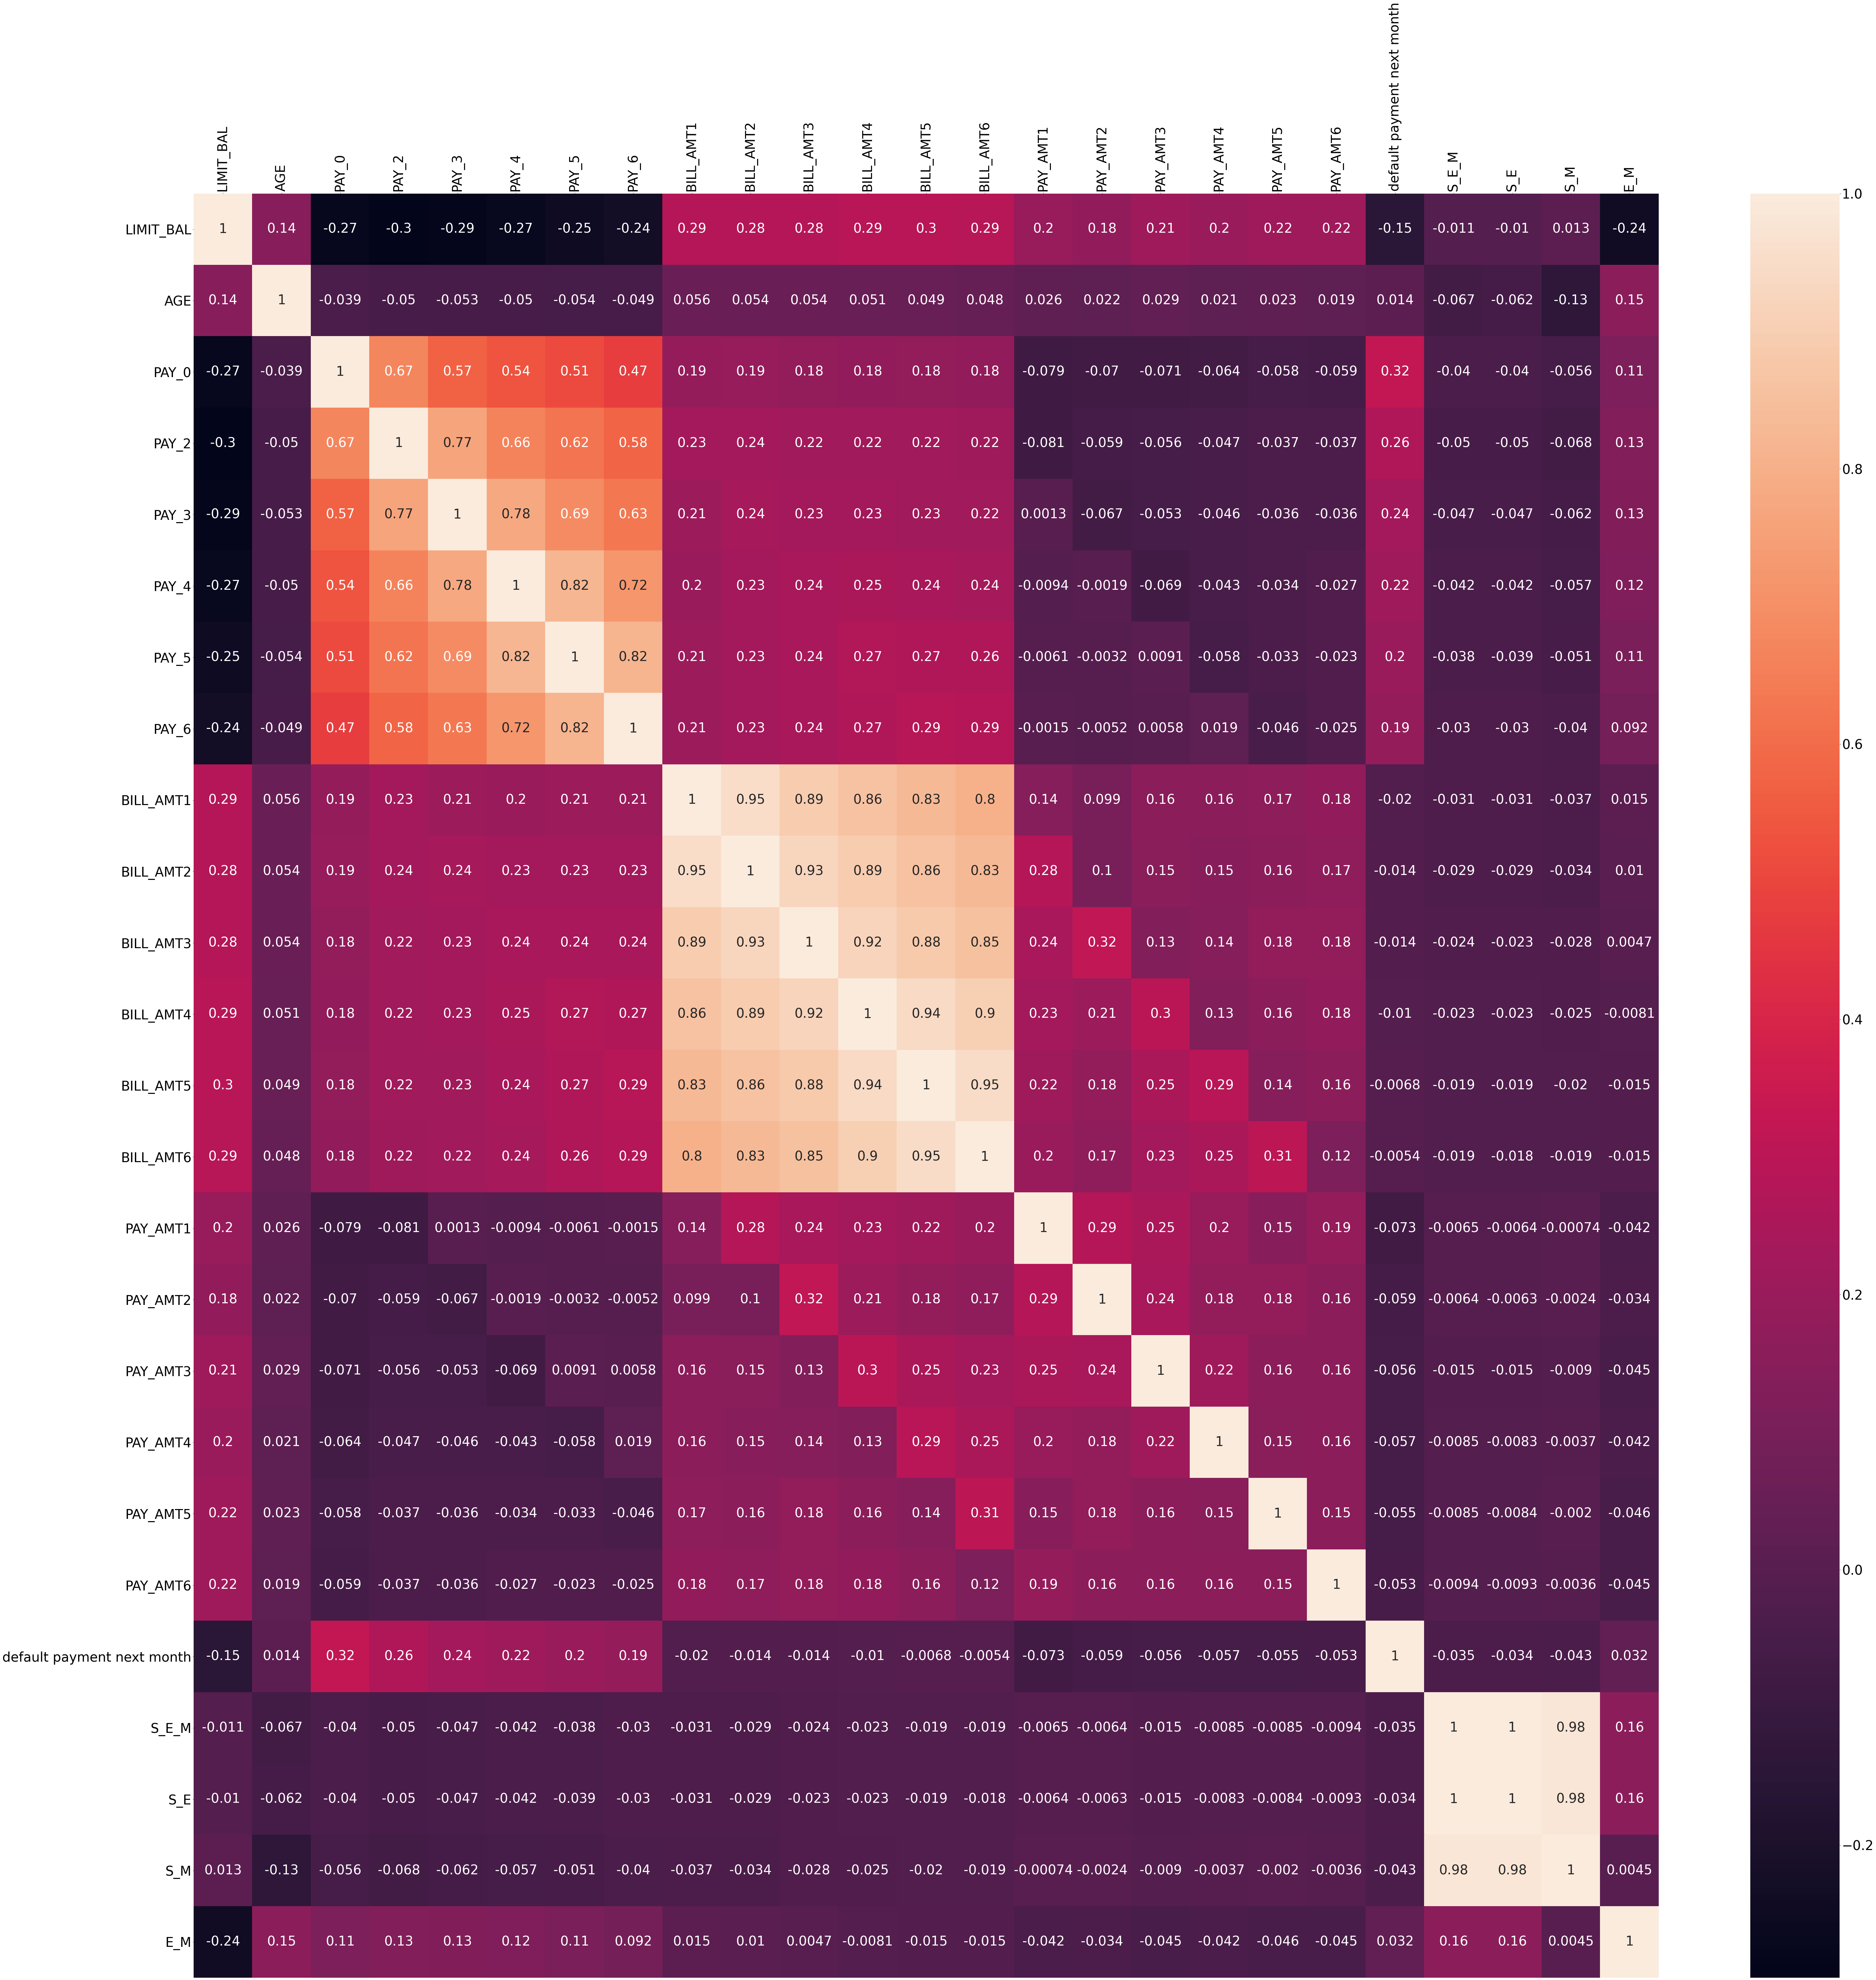

In [70]:
corrMatrix = bank_db_df_corr.corr()
sns.heatmap(corrMatrix, annot=True)
plt.rcParams.update({'font.size': 80})
plt.rcParams["figure.figsize"] = (100,100)
plt.show()

<AxesSubplot:xlabel='SEX,EDUCATION,MARRIAGE'>

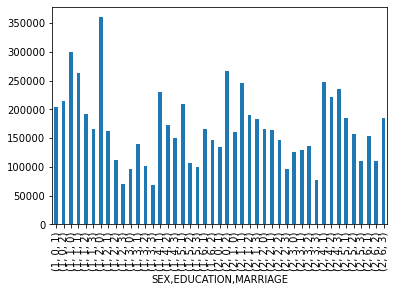

In [26]:
bank_db_df.groupby(['SEX','EDUCATION','MARRIAGE']).count()

gb_bank_df = bank_db_df.groupby(['SEX','EDUCATION','MARRIAGE']).count()

ID  LIMIT_BAL   AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
SEX EDUCATION MARRIAGE                                                      
1   0         1            2          2     2      2      2      2      2   
              2            6          6     6      6      6      6      6   
    1         0            1          1     1      1      1      1      1   
              1         1690       1690  1690   1690   1690   1690   1690   
              2         2633       2633  2633   2633   2633   2633   2633   
              3           30         30    30     30     30     30     30   
    2         0            1          1     1      1      1      1      1   
              1         2370       2370  2370   2370   2370   2370   2370   
              2         2940       2940  2940   2940   2940   2940   2940   
              3           63         63    63     63     63     63     63   
    3         0           12         12    12     12     12     12     12   
              1         1048       1048  1048   1048   1048   1048   1048   
              2          894        894   894    894    894    894    894   
              3           36         36    36     36     36     36     36   
    4         1           18         18    18     18     18     18     18   
              2           23         23    23     23     23     23     23   
              3            1          1     1      1      1      1      1   
    5         1           48         48    48     48     48     48     48   
              2           46         46    46     46     46     46     46   
              3            1          1     1      1      1      1      1   
    6         1           14         14    14     14     14     14     14   
              2           11         11    11     11     11     11     11   
2   0         1            2          2     2      2      2      2      2   
              2            4          4     4      4      4      4      4   
    1         0            3          3     3      3      3      3      3   
              1         2032       2032  2032   2032   2032   2032   2032   
              2         4176       4176  4176   4176   4176   4176   4176   
              3           20         20    20     20     20     20     20   
    2         0            5          5     5      5      5      5      5   
              1         4472       4472  4472   4472   4472   4472   4472   
              2         4080       4080  4080   4080   4080   4080   4080   
              3           99         99    99     99     99     99     99   
    3         0           32         32    32     32     32     32     32   
              1         1813       1813  1813   1813   1813   1813   1813   
              2         1015       1015  1015   1015   1015   1015   1015   
              3           67         67    67     67     67     67     67   
    4         1           34         34    34     34     34     34     34   
              2           45         45    45     45     45     45     45   
              3            2          2     2      2      2      2      2   
    5         1          102        102   102    102    102    102    102   
              2           81         81    81     81     81     81     81   
              3            2          2     2      2      2      2      2   
    6         1           14         14    14     14     14     14     14   
              2           10         10    10     10     10     10     10   
              3            2          2     2      2      2      2      2   

                        PAY_5  PAY_6  BILL_AMT1  ...  BILL_AMT4  BILL_AMT5  \
SEX EDUCATION MARRIAGE                           ...                         
1   0         1             2      2          2  ...          2          2   
              2             6      6          6  ...          6          6   
    1         0             1      1          1  ...          1          1   
              1 

ValueError: Bar is not a valid plot kind